# **Customer Profiling using E-commerce data**

## **Author - Varad Deshpande**

E-commmerce is one of the booming industry in the world. Before E-commerce, companies used to understand the customer buying patterns and their purchasing power by observing how they are buying products in store. But as the world of consumers have shifted online, it is very important to understand how the consumers are behaving in the online market. There is a greate scope of profiling consumers based on their purchasing patterns, locations, income and the amount of money they want to spend on E-Commerce product. With this we can also get the curve in consumer buying certian products online while other products offline. Let us dive deep into understanding one such E-Commerce market.

The dataset contains Brazil's E-Commerce data and it has been obtained from kaggle. This is the primary dataset
https://www.kaggle.com/olistbr/brazilian-ecommerce

The secondary dataset is: https://www.kaggle.com/carrie1/ecommerce-data
This contains E-commerce data of Europe, and very short data of North america and South America

In [24]:
#Importing the packages
import matplotlib.pyplot as plt
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#importing data
cd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/customer_data.csv')
ocd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_customer_data.csv') #most important file
oid = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_item_data.csv')
opd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_payment_data.csv')
pdd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/product_data.csv')
pnd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/product_name_data.csv')

In [26]:
cd_oid = cd.join(oid,how = 'left')
cd_oid_opd = cd_oid.merge(opd, on = 'order_id', how = 'left')
cd_oid_opd_pdd = cd_oid_opd.merge(pdd, on = 'product_id', how = 'left')
cd_oid_opd_pdd_pnd = cd_oid_opd_pdd.merge(pnd, on = 'product_category_name', how ='left')

In [27]:
df = cd_oid_opd_pdd_pnd[['customer_id', 'customer_unique_id','order_id', 'seller_id','product_id','product_category_name_english', 'customer_city', 'customer_state', 'price', 'freight_value','payment_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']]
df = df.dropna()

In [28]:
state = df.groupby('customer_state').size().reset_index()

In [29]:
product_category = df.groupby('product_category_name_english').size().reset_index()

In [30]:
# creating the list of useful values and attributes
from tqdm import tqdm
category_name = np.asarray(product_category['product_category_name_english'])
state_name = np.asarray(state['customer_state'])
plot_data = []
for i in range(len(state_name)):
    df1 = df.loc[df['customer_state'] == state_name[i]]

    for j in range(len(category_name)):
        sum1 = (df1.loc[df1['product_category_name_english'] == category_name[j], 'payment_value'].sum())
        plot_data.append((state_name[i], category_name[j], sum1))   

In [31]:
df2 = pd.DataFrame(plot_data, columns =['state_name', 'category_name', 'revenue'])

In [32]:
#reshaping the array to make a grid of 27x71
array2d = np.asarray(df2['revenue']).reshape(27,71)

In [33]:
#finding the unique values for  both the axes
uniq_state = df2['state_name'].unique()
uniq_category = df2['category_name'].unique()

### **Creating Heatmap of revenue of product category in given state**

In [34]:
mySelectedLabel = ipywidgets.Label()

In [35]:
import bqplot
from bqplot import pyplot
# 2. scales - linear scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='category_name')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='state_name')
ax_col = bqplot.ColorAxis(scale = c_sc, orientation='vertical', side='right') 
# 4. Marks
heat_map = bqplot.GridHeatMap(color = array2d, 
                              row = uniq_state, 
                              column = uniq_category, 
                              scales = {'color':c_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             title = 'Revenue Generated Per Category from Each State')
#                              selected_style={'opacity':1.0},
#                              unselected_style={'opacity':0.8})

#5. interactivity
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = array2d[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'Total Revenue from product category: '+ uniq_category[i] +' is '+ '$'+str(round(v, 4)) + '\n' +' in state: ' + uniq_state[i]

        
# make sure we are observing for changes in our heatmap
heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
#fig

# dashboard with my label
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

The very first thing to understand about online purchase is understanding how much money people are putting in buying different products. In Brazil dataset, it can be seen that every state has different per capita income and people spend different amount of money and also on different categories. On this heatmap you can click on any brick to know in a given state for a given product how many dollars are spent. The bricks/tiles are also showing the colors as per the magnitude of amount spent. You can select the highest revenue generating tile directly by looking at the heatmap.

### **Other Dashboard Plots**

#### **Bar plot to show total revenue generated in a given state**

In [36]:
bar_data = df.groupby('customer_state').sum().reset_index()

In [37]:
states  = bar_data['customer_state'].unique()
revenue = np.asarray(bar_data['payment_value'])

<BarContainer object of 27 artists>

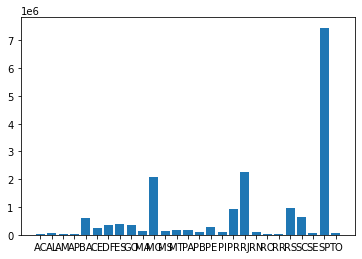

In [38]:
plt.bar(states, revenue)

This plot shows the amount of money spent by consumers from each state. This helps us understand how consumers from different state can spend differently as per their needs. States with larger cities have morerevenues as compared to small states with less number of cities.

#### **Scatter plot to show number of customers buying given product**

In [39]:
scc_data = df.groupby('product_category_name_english').count().reset_index()

In [40]:
product_category = scc_data['product_category_name_english']
number_customer = scc_data['customer_unique_id']
len(product_category), len(number_customer)
fig3_array = np.asarray(number_customer)

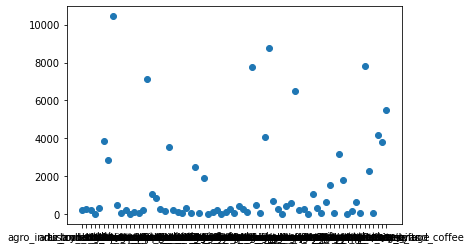

In [41]:
plt.scatter(product_category, number_customer)

Another important factor we can extract from E-Commerce data is the popularity if a given product category. Consumers tend to buy some specific categories of products from online market. The scatter plot shows the number of customers who bought their product.

#### **Line plot to show shipping cost for a given state**

In [42]:
line_data = df.groupby('customer_state').mean().reset_index()

In [43]:
state_cust = line_data['customer_state']
fri_value = line_data['freight_value']
fig4_array = np.asarray(fri_value)

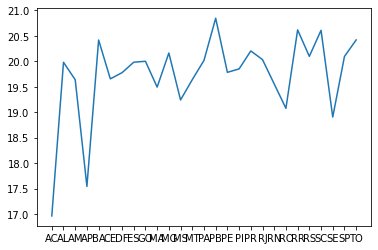

In [44]:
plt.plot(state_cust, fri_value)

Patterns in data have shown that people from different state reacts differently for the shipping costs of the products. For online products it has been seen that the warehouses of these E-Commerce companies are concentrated on one of the states in a given region and the shipping cost is decided by how far the given customer location is from the warehouse. This plot shows us how shipping cost changes for different states in Brazil.

## **Final Dashboard**

In [45]:
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = array2d[i,j] # this is a 2d array!!
        v2 = fig3_array[j]
        v3 = fig4_array[i]
        mySelectedLabel.value = 'For State: '+  uniq_state[i] + ' and Product Category: ' + uniq_category[j]  + ' Revenue is: ' + str(round(v, 4)) + ' Number of Customers are: ' + str(v2) + ' and Average Shipping cost for this state is: ' + str(round(v3, 4))
        linep1.y = revenue[i:j] #fig2
        linep2.y = number_customer[i:j]
        linep3.y = fri_value[i:j]

In [46]:
from bqplot import pyplot
# 2. scales - linear scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='category_name')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='state_name')
ax_col = bqplot.ColorAxis(scale = c_sc, orientation='vertical', side='right') 
# 4. Marks
heat_map = bqplot.GridHeatMap(color = array2d, 
                              row = uniq_state, 
                              column = uniq_category, 
                              scales = {'color':c_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
# make sure we are observing for changes in our heatmap
heat_map.observe(on_selected, 'selected')
fig1 = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])

In [47]:
#Line Plot
fig2 = bqplot.pyplot.figure(title='Revenue generated by Each State', background_style={'fill': 'lightgreen'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
axes_options = {'x': {'label': 'State'},
                'y': {'label': 'Amount in USD', 'tick_format': '0.0f'}}
linep1 = bqplot.pyplot.bar(x = np.asarray(bar_data['customer_state']), y = revenue, axes_options=axes_options, scales = {'x': x_sc, 'y': y_sc})
fig2 

Figure(axes=[Axis(label='State', scale=OrdinalScale()), Axis(label='Amount in USD', orientation='vertical', sc…

In [48]:
#Line Plot
fig3 = bqplot.pyplot.figure(title='Number of Customers buying from a given product category', background_style={'fill': 'lightblue'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
axes_options = {'x': {'label': 'Product Cateory'},
                'y': {'label': 'Number of Customers', 'tick_format': '0.0f'}}
linep2 = bqplot.pyplot.scatter(x = np.asarray(scc_data['product_category_name_english']), y = number_customer, axes_options=axes_options, scales = {'x': x_sc, 'y': y_sc})
fig3

Figure(axes=[Axis(label='Product Cateory', scale=OrdinalScale()), Axis(label='Number of Customers', orientatio…

In [49]:
fig4 = bqplot.pyplot.figure(title='Shipping Cost Paid in Different States', background_style={'fill': 'lightgrey'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
axes_options = {'x': {'label': 'State'},
                'y': {'label': 'Shipping Cost', 'tick_format': '0.0f'}}
linep3 = bqplot.pyplot.plot(x = np.asarray(line_data['customer_state']), y = fri_value, axes_options=axes_options, scales = {'x': x_sc, 'y': y_sc})
fig4

Figure(axes=[Axis(label='State', scale=OrdinalScale()), Axis(label='Shipping Cost', orientation='vertical', sc…

In [50]:
fig1.layout.min_width='500px'
fig2.layout.min_width='500px'
fig3.layout.min_width='500px'
fig4.layout.min_width='500px'

figures = ipywidgets.HBox([fig1, fig2]) # figures side-by-side
figuresv = ipywidgets.HBox([fig3, fig4])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures, figuresv])
myDashboard

Dashboard above is showing the effect of above four plots on each other. The Dashboard as shown takes input from the heatmap. The heatmap input can be taken by clicking on any one tile and it shows us the revenue for that state and product category. But as we select the state and product category other plots in the dashboard changes according to this input. The plot on the top right shows us the effect on total revenue on that state. the bottom left plot shows the change in number of customers buying the given selected product category. Finally, the bottom right plot changes as per the shipping cost in that state. This complete dashboard gives a great overview of how the consumers are behaving in the E-Commerce market and how their preferences change depending on the product category and location.

## **Contextual Visualization**

In [ ]:
# #importing data
df1 = pd.read_csv('https://raw.githubusercontent.com/Varadad/Varadad.github.io/master/data/data1.csv', encoding = 'unicode_escape')
df2 = pd.read_csv('https://raw.githubusercontent.com/Varadad/Varadad.github.io/master/data/data2.csv', encoding = 'unicode_escape')

In [ ]:
df_new = df1.join(df2, how = 'left')

In [ ]:
# multiplying to find actual revenue
df_new['actual_cost_paid'] = df_new['Quantity']*df_new['UnitPrice']

#### **Scatter plot for Amount spent by consumers in online shopping**

In [ ]:
customer = df_new.groupby('CustomerID').sum().reset_index()

In [ ]:
fig = plt.figure(figsize = (20,25))
x1 = customer['CustomerID']
y1 = customer['actual_cost_paid']
plt.xlabel("Customers")
plt.ylabel("Amount Spent")
plt.title("Amount Spent by customers on online shopping")
scatter_plot = plt.scatter(x1, y1)
plt.show()

#### **Bar plot to show average quantity of purchase made in different countries**

In [ ]:
quantity = df_new.groupby('Country').mean().reset_index()

In [ ]:
fig = plt.figure(figsize = (30,15))
x1 = quantity['Country']
y1 = quantity['Quantity']
plt.xlabel("Countries")
plt.ylabel("Average Quantity")
plt.title("Average quantity of online products in different countries")
plt.xticks(rotation=45)
scatter_plot = plt.bar(x1, y1)
plt.savefig('avg_quantity_countries.png')
plt.show()

Unlike the traditional markets for buying consumer goods, it can be seen that people around the globe with good E-Commerce alternative are following similar trends as we used to see in the traditional markets. The alternative dataset of E-Commerce purchases form different countries reveals some great similarities with the Brazil's data. It can be seen that most of the customers spent only a limited amount of money on E-Commerce and there are very few customers, who tend to buy super expensive products form the E-Commerce market. This is the same pattern as of the bottom left plot of the dashboard. Consumers tend to buy similar products and from some specific product categories in online market. The second plot is a great interpretation of different countries' consumers buying pattern. It shows the average number of products consumer buys every time consumer shops online. There are some start revelations and it shows the importance of demographics and income of consumers. The field of Consumer profiling is a hot topic in the world of Data Analytic and E-Commerce companies are gaining great markets by understanding the needs of people based on regional demographics and per capita income.

### **References**